In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv('test.csv')

In [3]:
print(df.head())

   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                      

In [4]:
print(df.shape)

(25976, 25)


In [5]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [6]:
# Check summary statistics

print(df.describe())

         Unnamed: 0             id           Age  Flight Distance  \
count  25976.000000   25976.000000  25976.000000     25976.000000   
mean   12987.500000   65005.657992     39.620958      1193.788459   
std     7498.769632   37611.526647     15.135685       998.683999   
min        0.000000      17.000000      7.000000        31.000000   
25%     6493.750000   32170.500000     27.000000       414.000000   
50%    12987.500000   65319.500000     40.000000       849.000000   
75%    19481.250000   97584.250000     51.000000      1744.000000   
max    25975.000000  129877.000000     85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count           25976.000000                       25976.000000   
mean                2.724746                           3.046812   
std                 1.335384                           1.533371   
min                 0.000000                           0.000000   
25%                 2.000000               

In [7]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [8]:
# Check for duplicate records
print("\nDuplicate Records Count:", df.duplicated().sum())


Duplicate Records Count: 0


In [9]:
# Make a copy of the dataset for preprocessing
df_clean = df.copy()

In [10]:
# Check unique values in satisfaction column
print("\nSatisfaction Categories:")
print(df_clean['satisfaction'].unique())


Satisfaction Categories:
['satisfied' 'neutral or dissatisfied']


In [11]:
df_clean['satisfaction_binary'] = df_clean['satisfaction'].apply(
    lambda x: 1 if isinstance(x, str) and 'satisfied' in x.lower() else 0
)


In [12]:
print(df_clean.columns)


Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'satisfaction_binary'],
      dtype='object')


In [13]:
print(df_clean['satisfaction'].isnull().sum())
print(df_clean['satisfaction'].head(20))


0
0                   satisfied
1                   satisfied
2     neutral or dissatisfied
3                   satisfied
4                   satisfied
5                   satisfied
6                   satisfied
7                   satisfied
8                   satisfied
9                   satisfied
10                  satisfied
11    neutral or dissatisfied
12                  satisfied
13                  satisfied
14                  satisfied
15    neutral or dissatisfied
16    neutral or dissatisfied
17                  satisfied
18    neutral or dissatisfied
19                  satisfied
Name: satisfaction, dtype: object


In [14]:
# Convert all to string first (ensures no float/NaN errors)
df_clean['satisfaction'] = df_clean['satisfaction'].astype(str).str.lower()

# Now apply the binary conversion
df_clean['satisfaction_binary'] = df_clean['satisfaction'].apply(
    lambda x: 1 if 'satisfied' in x else 0
)

In [15]:
df_clean['satisfaction_binary'] = df_clean['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})


In [16]:
print(df_clean[['satisfaction', 'satisfaction_binary']].head())


              satisfaction  satisfaction_binary
0                satisfied                    1
1                satisfied                    1
2  neutral or dissatisfied                    0
3                satisfied                    1
4                satisfied                    1


In [17]:
print(df_clean['satisfaction_binary'].value_counts())

satisfaction_binary
0    14573
1    11403
Name: count, dtype: int64


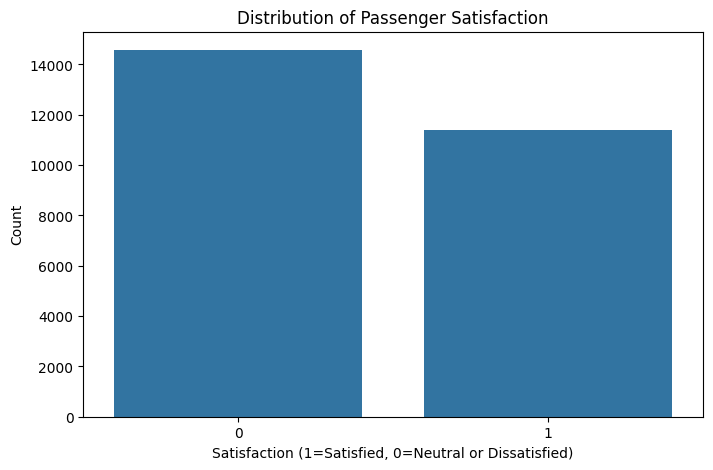

In [20]:
# Check the distribution of satisfaction
plt.figure(figsize=(8, 5))
sns.countplot(x='satisfaction_binary', data=df_clean)
plt.title('Distribution of Passenger Satisfaction')
plt.xlabel('Satisfaction (1=Satisfied, 0=Neutral or Dissatisfied)')
plt.ylabel('Count')
plt.show()
plt.savefig('satisfaction_distribution.png')
plt.close()


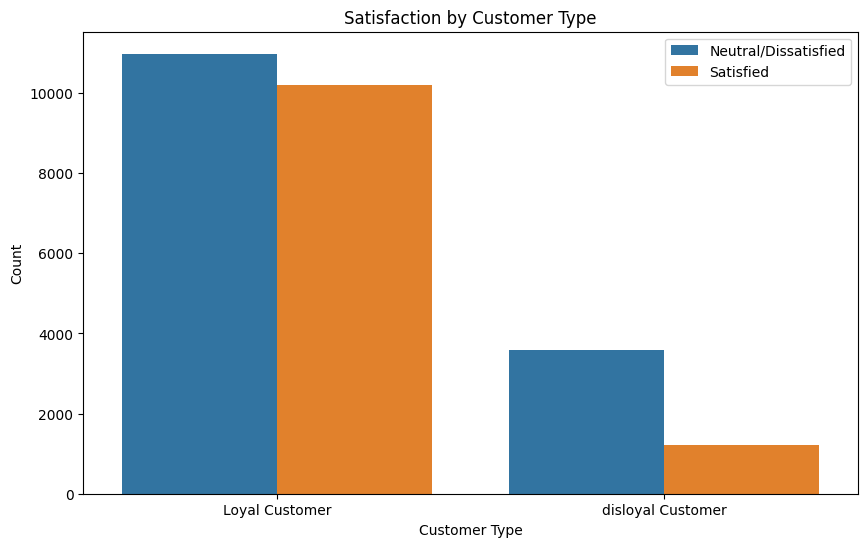

In [21]:
# Analyze satisfaction by Customer Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer Type', hue='satisfaction_binary', data=df_clean)
plt.title('Satisfaction by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(['Neutral/Dissatisfied', 'Satisfied'])
plt.show()
plt.savefig('satisfaction_by_customer_type.png')
plt.close()


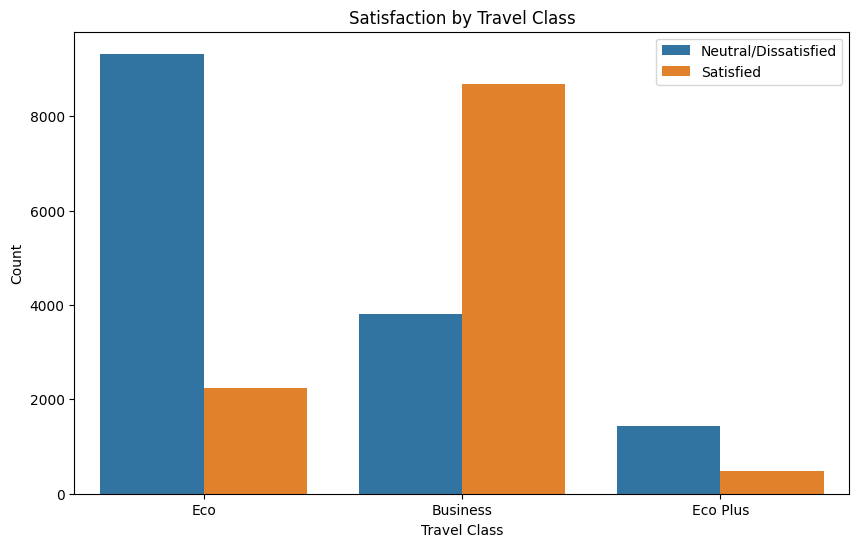

In [22]:
# Analyze satisfaction by Class
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', hue='satisfaction_binary', data=df_clean)
plt.title('Satisfaction by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Count')
plt.legend(['Neutral/Dissatisfied', 'Satisfied'])
plt.show()
plt.savefig('satisfaction_by_class.png')
plt.close()

In [23]:
# Correlation analysis of numerical features
# Select only numeric columns for correlation analysis
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'id'] # Exclude id column


In [24]:
# Create correlation matrix
correlation_matrix = df_clean[numeric_cols].corr()

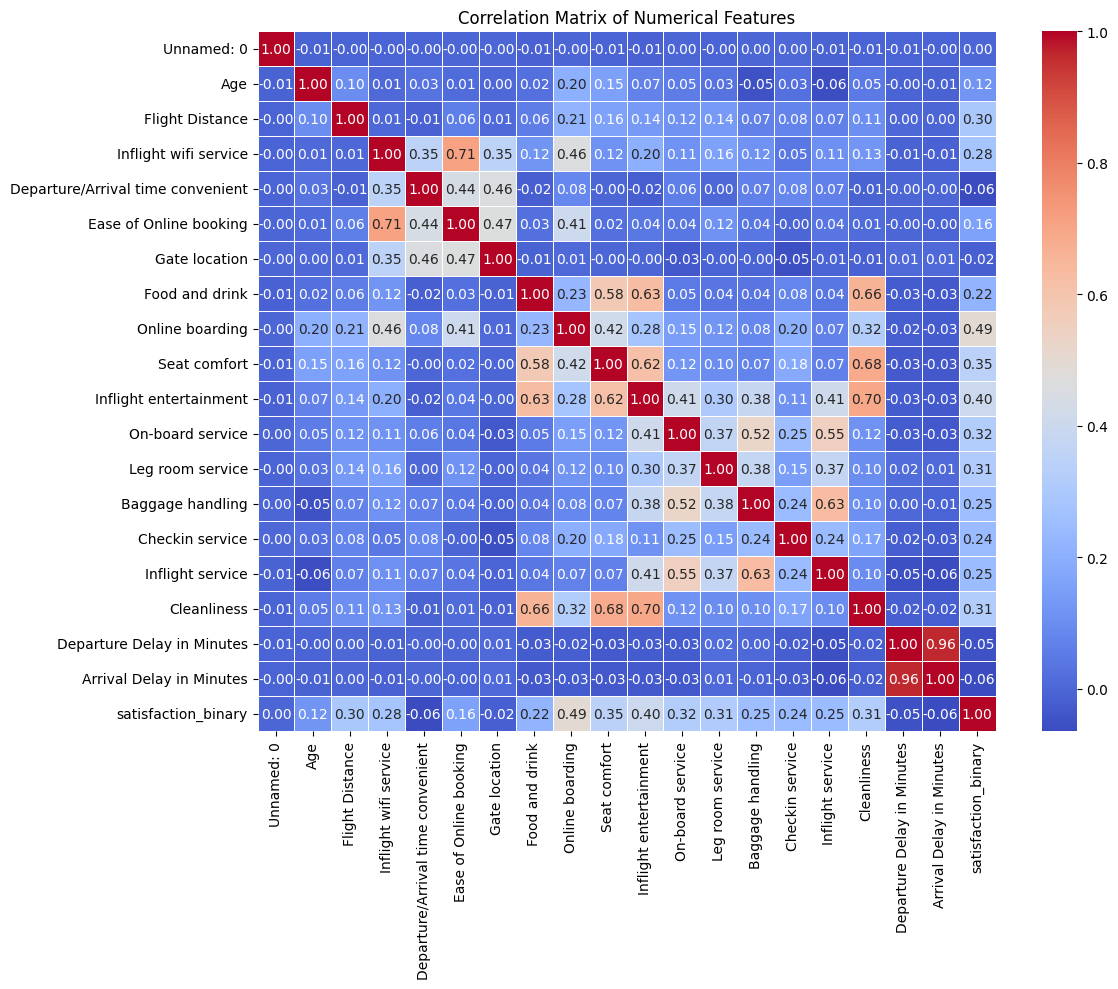

In [25]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()
plt.savefig('correlation_heatmap.png')
plt.close()


In [26]:
# Select features for the model (excluding id, target, and redundant columns)
features = [col for col in df_clean.columns if col not in ['id', 'satisfaction', 'satisfaction_binary']]


In [27]:
# Handle categorical variables with one-hot encoding
df_model = pd.get_dummies(df_clean[features], drop_first=True)

In [28]:
# Prepare X and y
X = df_model
y = df_clean['satisfaction_binary']


In [29]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [32]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model performance
print("\nModel Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy Score: 0.9463621198511485

Confusion Matrix:
[[4243  168]
 [ 250 3132]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4411
           1       0.95      0.93      0.94      3382

    accuracy                           0.95      7793
   macro avg       0.95      0.94      0.95      7793
weighted avg       0.95      0.95      0.95      7793



In [33]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(10)

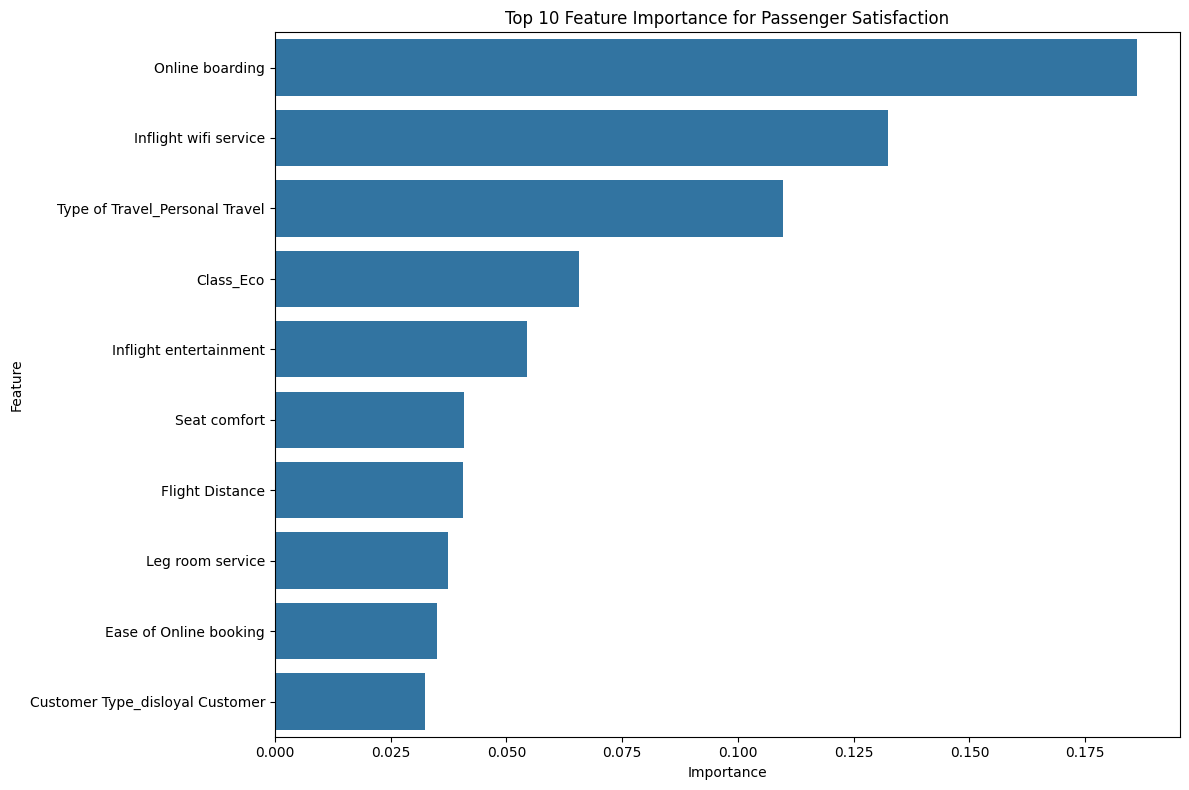

In [34]:
# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top 10 Feature Importance for Passenger Satisfaction')
plt.tight_layout()
plt.show()
plt.savefig('feature_importance.png')
plt.close()